<a href="https://colab.research.google.com/github/Ajay-Kandagatla/DATASCIENCE/blob/main/Cement_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Imputing Data Manipulation Library

import pandas as pd
import numpy as np

# Importing Data Visualization Library

import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarning Library

import warnings
warnings.filterwarnings('ignore')

In [36]:
# Import Data Using Pandas Function

df = pd.read_csv('Concrete_Data.csv')

# Shuffle 100% Dataset

df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
259,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,3,13.33
398,160.0,128.0,122.0,182.0,6.4,824.0,879.0,28,39.40
164,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
531,436.0,0.0,0.0,218.0,0.0,838.4,719.7,28,23.85
775,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,22.44
...,...,...,...,...,...,...,...,...,...
846,366.0,187.0,0.0,191.0,7.0,824.0,757.0,28,65.91
392,333.0,17.5,163.0,167.0,17.9,996.0,652.0,28,47.28
621,307.0,0.0,0.0,193.0,0.0,968.0,812.0,180,34.49
824,302.0,0.0,0.0,203.0,0.0,974.0,817.0,28,21.75


In [37]:
# Checking Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [38]:
print(df.isnull().sum() / len(df) *100)

Cement (component 1)(kg in a m^3 mixture)                0.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.0
Fly Ash (component 3)(kg in a m^3 mixture)               0.0
Water  (component 4)(kg in a m^3 mixture)                0.0
Superplasticizer (component 5)(kg in a m^3 mixture)      0.0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.0
Age (day)                                                0.0
Concrete compressive strength(MPa, megapascals)          0.0
dtype: float64


In [39]:
# Split the dataset into Categorical and Numerical cols...
numerical_col = df.select_dtypes(exclude = 'object')
numerical_col

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [40]:
categorical_col = df.select_dtypes(include = 'object')
categorical_col

""
0
1
2
3
4
...
1025
1026
1027
1028


In [41]:
# Exploratory Data Analysis:
# 1. Univariate Analysis
def univariate_stats():
  from collections import OrderedDict

  stats = []

  for i in numerical_col:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Minimum': df[i].min(),
        'Maximum': df[i].max(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Q1': df[i].quantile(0.25),
        'Q3': df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation': df[i].std(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis()

    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

  return report

ans = univariate_stats()
ans

,Feature,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),1030,102.00,540.0,281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,1030,0.00,359.4,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),1030,0.00,200.1,54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),1030,121.80,247.0,181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,1030,0.00,32.2,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1030,801.00,1145.0,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1030,594.00,992.6,773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),1030,1.00,365.0,45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",1030,2.33,82.6,35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


In [42]:
# Step 1: Split the data into X and y
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1)

y = df['Concrete compressive strength(MPa, megapascals) ']

In [43]:
# Step 2: Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [44]:
# Step 3: Use Scaling Technique
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
# Model Building
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

y_pred_LR = LR.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred_LR)

0.5943782479239215

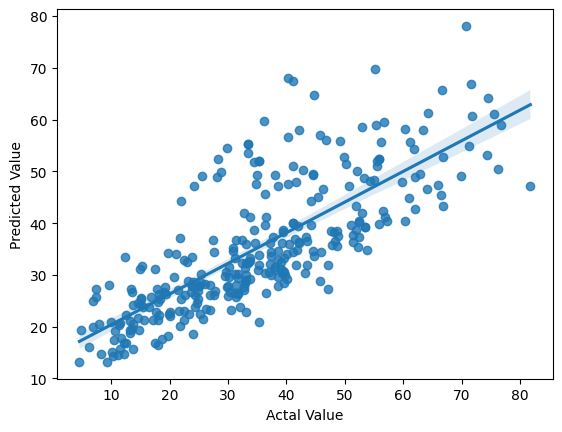

In [46]:
sns.regplot(x = y_test, y = y_pred_LR)
plt.xlabel('Actal Value')
plt.ylabel('Predicted Value')
plt.show()

In [47]:
LR.intercept_

np.float64(-13.616932642237444)

In [48]:
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [49]:
X.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [50]:
# Ridge and Lasso

from sklearn.linear_model import Ridge,Lasso

Ridge = Ridge().fit(X_train,y_train)
y_pred_Ridge = Ridge.predict(X_test)

print(f'The Model Acuuracy for Lasso Regressor',r2_score(y_test,y_pred_Ridge))

The Model Acuuracy for Lasso Regressor 0.595277347313935


In [51]:
Lasso = Lasso().fit(X_train,y_train)
y_pred_Lasso = Lasso.predict(X_test)

print(f'The Model Acuuracy for Lasso Regressor',r2_score(y_test,y_pred_Lasso))

The Model Acuuracy for Lasso Regressor 0.1944637404527887


In [54]:
# Using Tree based Algorithm
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)

y_pred_DT = DT.predict(X_test)

print(f'The Model Accuracy For Decision Tree Regressor is',r2_score(y_test,y_pred_DT))

The Model Accuracy For Decision Tree Regressor is 0.8299752248104957


In [55]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

print(f'The model accuracy for Random Forest Regression is',r2_score(y_test,y_pred_RF))

The model accuracy for Random Forest Regression is 0.8833974529003362


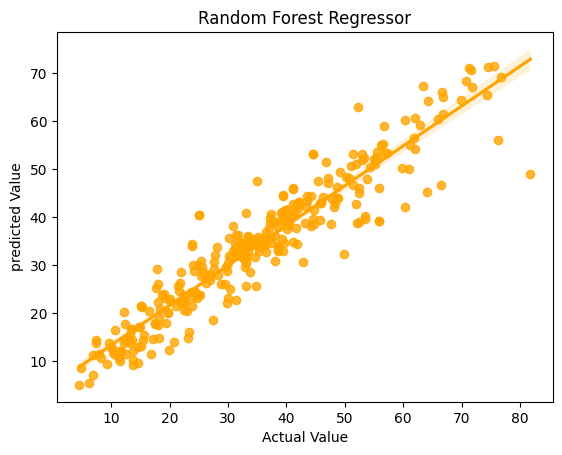

In [58]:
sns.regplot(x = y_test, y = y_pred_RF, color = 'orange')
plt.title('Random Forest Regressor')
plt.xlabel('Actual Value')
plt.ylabel('predicted Value')
plt.show()

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GB = GB.predict(X_test)
print(f'The model accuracy for Gradient Boosting Regressor is',r2_score(y_test,y_pred_GB))

The model accuracy for Gradient Boosting Regressor is 0.8913247719769352


In [63]:
from XGboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print(f'The model accuracy for XGBRegressor is',r2_score(y_test,y_pred_XGB))

ModuleNotFoundError: No module named 'XGboost'